In [ ]:
#  core
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, balanced_accuracy_score
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data Analysis Pepeline:
1. Data Exploration
2. Data Cleaning
3. Feature Engineering
4. EDA (Visualisation)
5. Data Preprocessing (Scaling & Encoding)
6. Feature Selection
7. Modeling
8. Model Evaluation & Optimization
9. Deployment & Interpretation

# **STEP 1: Data Exploration**

## **Column Descriptions**

> Dataset Name: Kaggle Titanic - Machine Learning from Disaster
- Goal: Predict survival of passengers based on demographics and onboard details
- Problem Type: Binary Classification (Survived or Not)

> Data Shape:
- Train Set: (891, 12) → Includes both features and the Survived label
- Test Set: (418, 11) → Same features as training set, no Survived column

> When converted into a Pandas DataFrame:

Survived (Target)
- Type: int (0 or 1)
- 0 = Did not survive, 1 = Survived
- Present only in train.csv

PassengerId
- Unique ID for each passenger (int)
- Used to identify passengers in the submission file

Pclass (Passenger Class)
- Socio-economic class (1 = Upper, 2 = Middle, 3 = Lower)
- Strongly correlated with survival

Name
- Full name of the passenger (string)
- Useful for extracting titles (Mr., Mrs., Miss., etc.)

Sex
- Gender (male or female)
- One of the most influential features for survival

Age
- Age in years (float)
- May contain missing values
- Often binned into categories for better modeling

SibSp (Siblings/Spouses Aboard)
- Number of siblings or spouses aboard the Titanic

Parch (Parents/Children Aboard)
- Number of parents or children aboard the Titanic

Ticket
- Ticket number (string)
- Often dropped; sometimes used for grouping

Fare
- Passenger fare (float)
- May be scaled or binned

Cabin
- Cabin number (string, often missing)
- Can be used to extract deck information

Embarked
- Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- Has a few missing values

## **Descriptive Statistics**

> Descriptive statistics summarize and describe the key features of a dataset.

In [9]:
# load the dataset
train = pd.read_csv('C:/Users/ARZ/Desktop/train.csv')
test = pd.read_csv('C:/Users/ARZ/Desktop/test.csv')

In [10]:
def dataset_snapshot(df):
    head = df.head(3)
    tail = df.tail(3)
    sample = df.sample(3)
    return pd.concat([head, tail, sample])

dataset_snapshot(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [11]:
def quick_overview(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "nunique": df.nunique(),
        "missing": df.isnull().sum()
    }).reset_index().rename(columns={"index": "column"})
quick_overview(train)

,column,dtype,nunique,missing
0,PassengerId,int64,891,0
1,Survived,int64,2,0
2,Pclass,int64,3,0
3,Name,object,891,0
4,Sex,object,2,0
5,Age,float64,88,177
6,SibSp,int64,7,0
7,Parch,int64,7,0
8,Ticket,object,681,0
9,Fare,float64,248,0


In [12]:
def check_df(df, target=None, head=3):
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 500)

    print("#################### SHAPE ########################")
    print(f"🔹 Rows: {df.shape[0]} | 🔹 Columns: {df.shape[1]}\n")
    
    print("#################### INFO #########################")
    print(df.info(), "\n")
 
    print("################## DESCRIPTIVE STATS (numerical) ##################")
    display(df.describe().T.style.background_gradient(cmap='PuBu'))
    
    print("################## DESCRIPTIVE STATS (categorical) ##################")
    display(df.describe(include='object').T.style.background_gradient(cmap='Oranges'))
    
    print("################## DUPLICATES ##################")
    print(f"🔁 Duplicate Rows: {df.duplicated().sum()}\n")

    if target and target in df.columns:
        print("############ TARGET DISTRIBUTION ############")
        print(df[target].value_counts(), "\n")

check_df(train, target= 'survived')

#################### SHAPE ########################
🔹 Rows: 891 | 🔹 Columns: 12

#################### INFO #########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

################## DESCRIPTIVE STATS (numerical) ##################


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


################## DESCRIPTIVE STATS (categorical) ##################


,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


################## DUPLICATES ##################
🔁 Duplicate Rows: 0



In [13]:
def show_unique_categories(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col} ({df[col].nunique()} unique): {df[col].unique()[:5]}{'...' if df[col].nunique() > 5 else ''}")

show_unique_categories(train)

Name (891 unique): ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']...
Sex (2 unique): ['male' 'female']
Ticket (681 unique): ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']...
Cabin (147 unique): [nan 'C85' 'C123' 'E46' 'G6']...
Embarked (3 unique): ['S' 'C' 'Q' nan]


# **STEP 2: Data Cleaning**

### **1️⃣Handle missing values**

In [14]:
# let's drop or fill missing values
for name, df in zip(['Train', 'Test'], [train, test]):
    missing = df.isnull().sum()[df.isnull().sum() > 0]
    if not missing.empty:
        print(f"\n{name} missing values:")
        print(missing)
    else:
        print(f"\n{name} has no missing values ✅")


Train missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64

Test missing values:
Age       86
Fare       1
Cabin    327
dtype: int64


In [15]:
# dealing with missing values for "Age" column

# fill the missing values with the mean?
for df in [train,test]:
    df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
# dealing with missing values for "Embarked" and "Fare" column

# fill the missing values with the most frequent value 'S'
train['Embarked'] = train['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(df['Fare'].median())

In [17]:
# dealing with missing values for "Cabin" column

for df in [train,test]:
    # extract the deck letters like 'C' in 'C85'
    df['Deck'] = df['Cabin'].str[0]
    # fill missing values with 'U' for 'unknown'
    df['Deck'] = df['Deck'].fillna('U')
    # encode deck as categories for further analysis
    df['Deck'] = df['Deck'].astype('category')

In [18]:
print("🔍 Missing values in TRAIN set:")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\n🔍 Missing values in TEST set:")
print(test.isnull().sum()[test.isnull().sum() > 0])

🔍 Missing values in TRAIN set:
Cabin    687
dtype: int64

🔍 Missing values in TEST set:
Cabin    327
dtype: int64


### **2️⃣ Remove duplicates**

In [19]:
# sanity check for duplicated values 
train.duplicated().sum()
test.duplicated().sum()

0

### **3️⃣ Remove features**

In [20]:
for df in [train,test]:
    df.drop(columns=['Ticket','Cabin'], inplace=True)

### **4️⃣ Fix incorrect/inconsistent data**

> Deals with wrong, inconsistent, or messy values (e.g., typos, inconsistent formats, leading/trailing spaces).

In [21]:
# Remove Leading/Trailing Spaces from Text Columns
for df in [train,test]:
    cat_columns = df.select_dtypes(include=['object']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.str.strip())

In [22]:
# Convert pclass to a category so models treat it properly (especially for tree-based models)
for df in [train,test]:
    df['Pclass'] = df['Pclass'].astype('category')

In [23]:
# Check for Invalid Numerical Values
for df in [train,test]:
    df['Fare'] = df['Fare'].replace(0.0, df['Fare'].median())

# **STEP 3: Feature Engineering**
- In this step, we create new meaningful features from existing data.

In [24]:
for name, df in zip(['Train', 'Test'], [train, test]):
    # Extract title
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

    # Standardize titles
    df['Title'] = df['Title'].replace(['Mlle'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme', 'Ms'], 'Mrs')
    
    # Map known rare titles to 'Rare'
    # dimensionality reduction for categorical variables
    rare_titles = ['Dona','Dr','Rev','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Don']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')

    # Drop name column
    df.drop(columns=['Name'], inplace=True, errors='ignore')

    print(f"n{name} Title counts after processing:")
    print(df['Title'].value_counts())

nTrain Title counts after processing:
Title
Mr        517
Miss      184
Mrs       127
Master     40
Rare       23
Name: count, dtype: int64
nTest Title counts after processing:
Title
Mr        240
Miss       78
Mrs        73
Master     21
Rare        6
Name: count, dtype: int64


In [25]:
# FamilySize = SibSp(no of siblings and spouses) + Parch(no of parents and children) + 1 (count the passenger themself)
for df in [train,test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(train['FamilySize'].value_counts())
print(test['FamilySize'].value_counts())

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
FamilySize
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64


In [26]:
# IsAlone
for df in [train,test]:
    df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
print(train['IsAlone'].value_counts())
print(test['IsAlone'].value_counts())

IsAlone
1    537
0    354
Name: count, dtype: int64
IsAlone
1    253
0    165
Name: count, dtype: int64


In [27]:
# FareBand
for df in [train,test]:
    df['FareBand'] = pd.qcut(df['Fare'],4,labels=['Very Low Fare','Low Fare','Medium Fare','High Fare'])
# sanity check
print(train['FareBand'].value_counts())
print(test['FareBand'].value_counts())

FareBand
Very Low Fare    226
Medium Fare      222
High Fare        222
Low Fare         221
Name: count, dtype: int64
FareBand
Very Low Fare    112
High Fare        105
Medium Fare      102
Low Fare          99
Name: count, dtype: int64


In [28]:
# FamilyType

# for df in [train, test]:
#     df['FamilyType'] = np.where(df['FamilySize'] == 1, 'Alone',
#                         np.where(df['FamilySize'] <= 4, 'Small', 'Large'))

for df in [train, test]:
    conditions = [
        (df['FamilySize'] == 1),
        (df['FamilySize'] >= 2) & (df['FamilySize'] <= 4),
        (df['FamilySize'] >= 5)
    ]
    choices = ['Alone', 'Small', 'Large']
    df['FamilyType'] = np.select(conditions, choices)

print(train['FamilyType'].value_counts())
print(test['FamilyType'].value_counts())

FamilyType
Alone    537
Small    292
Large     62
Name: count, dtype: int64
FamilyType
Alone    253
Small    145
Large     20
Name: count, dtype: int64


In [29]:
# SimplifiedDeck
for df in [train,test]:
    conditions = [
        df['Deck'].isin(['A', 'B', 'C']),
        df['Deck'].isin(['D', 'E']),
        df['Deck'].isin(['F', 'G']),
        df['Deck'].isin(['U', 'T'])
    ]
    choices = ['Upper','Middle','Lower','Unknown']
    df['SimplifiedDeck'] = np.select(conditions,choices,default='Unknown')

print(train['SimplifiedDeck'].value_counts())
print(test['SimplifiedDeck'].value_counts())

SimplifiedDeck
Unknown    688
Upper      121
Middle      65
Lower       17
Name: count, dtype: int64
SimplifiedDeck
Unknown    327
Upper       60
Middle      22
Lower        9
Name: count, dtype: int64


In [30]:
# IsChild
for df in [train,test]:
    # df['IsChild'] = np.where(df['Age'] < 12, 'Child', 'Adult')
    df['IsChild'] = df['Age'].apply(lambda x: 'Child' if x < 12 else 'Adult')
print(train['IsChild'].value_counts())
print(test['IsChild'].value_counts())

IsChild
Adult    823
Child     68
Name: count, dtype: int64
IsChild
Adult    395
Child     23
Name: count, dtype: int64


In [31]:
for df in [train,test]:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','Young Adult','Adult','Senior'])
print(train['AgeGroup'].value_counts())
print(test['AgeGroup'].value_counts())

AgeGroup
Young Adult    535
Adult          195
Teen            70
Child           69
Senior          22
Name: count, dtype: int64
AgeGroup
Young Adult    259
Adult           94
Teen            29
Child           25
Senior          11
Name: count, dtype: int64


# **STEP 4: EDA**

> EDA helps understand the distribution, relationships, and trends in data before applying machine learning or advanced analysis.

### **1️⃣ Outlier Detection**

In [32]:
# IQR-based filtering	Identify extreme outliers
# Boxplot or boxenplot	Visualize spread and outliers
# Winso rization (capping)	Replace with upper/lower bounds instead of removing

In [33]:
train.describe().style.background_gradient(cmap='BrBG')

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.447545,1.904602,0.602694
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.570235,1.613459,0.489615
min,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,1.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.925000,1.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [34]:
# IDENTIFYING OUTLIERS using IQR since the data is skewed

numeric_cols = ['Age','Fare','FamilySize','SibSp','Parch']

Q1 = train[numeric_cols].quantile(0.25)
Q3 = train[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (train[numeric_cols] < lower_bound) | (train[numeric_cols] > upper_bound)

# Display rows where any column has an outlier
outlier_detected = train.loc[outliers_iqr.any(axis=1), numeric_cols]
display(outlier_detected)

,Age,Fare,FamilySize,SibSp,Parch
1,38.0,71.2833,2,1,0
7,2.0,21.0750,5,3,1
8,27.0,11.1333,3,0,2
10,4.0,16.7000,3,1,1
11,58.0,26.5500,1,0,0
...,...,...,...,...,...
871,47.0,52.5542,3,1,1
879,56.0,83.1583,2,0,1
880,25.0,26.0000,2,0,1
885,39.0,29.1250,6,0,5


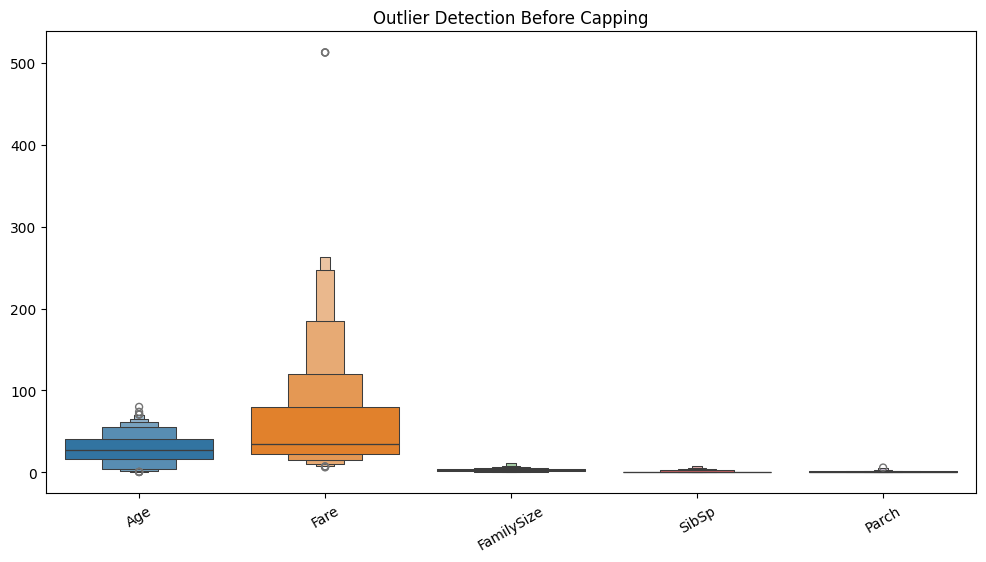

In [35]:
# visualize outliers before capping
plt.figure(figsize=(12, 6))
sns.boxenplot(data=outlier_detected)
plt.xticks(rotation=30)  # Rotates the x-axis labels
plt.title("Outlier Detection Before Capping")
plt.show()

# no further actions needed as all outliers are legit.

### **2️⃣ Numeric Distributions**

In [36]:
dist_cols = ['Age', 'Fare', 'FamilySize']

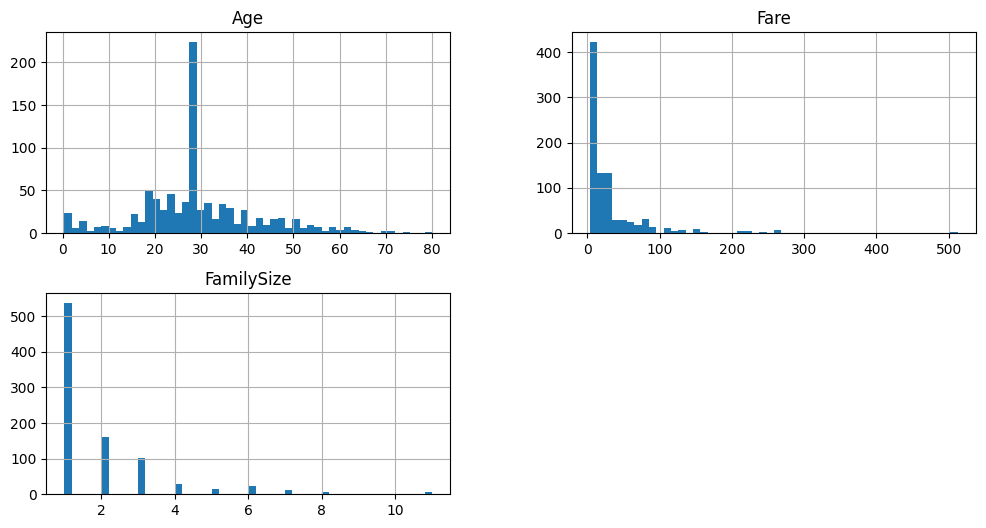

In [37]:
# Histogram	Check skewness & distribution shape
train[dist_cols].hist(bins=50, figsize=(12,6))
plt.show()

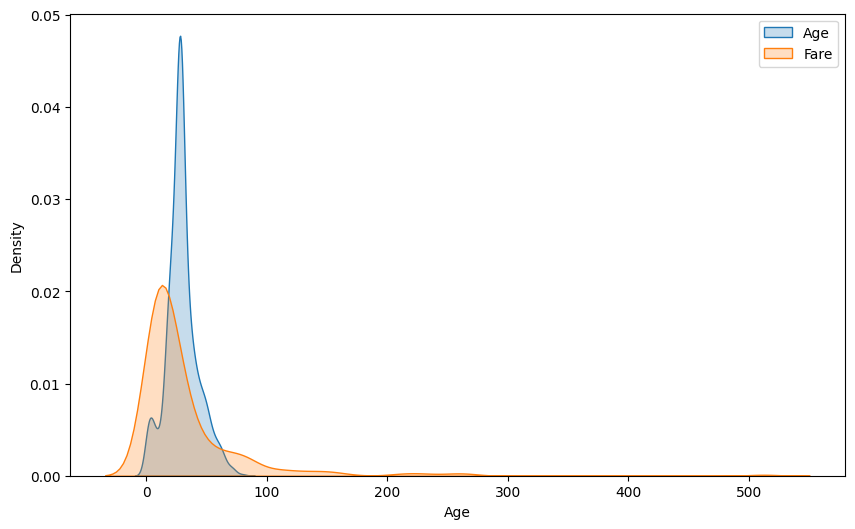

In [38]:
# KDE plot	Smoothed distribution curves
plt.figure(figsize=(10,6))
sns.kdeplot(train['Age'], label="Age", shade=True)
sns.kdeplot(train['Fare'], label="Fare", shade=True)
plt.legend()

([0, 1, 2], [Text(0, 0, 'Age'), Text(1, 0, 'Fare'), Text(2, 0, 'FamilySize')])

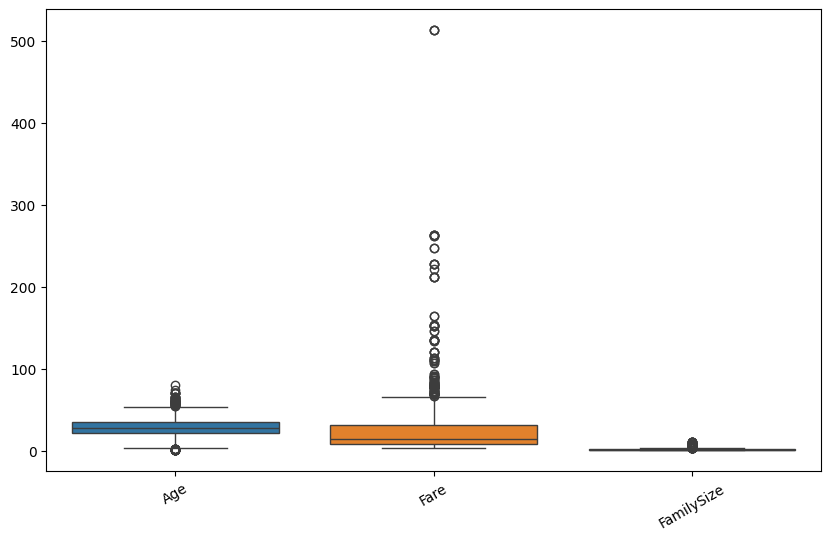

In [39]:
# Boxplot	Median, IQR, and outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=train[dist_cols])
plt.xticks(rotation=30)

<Axes: >

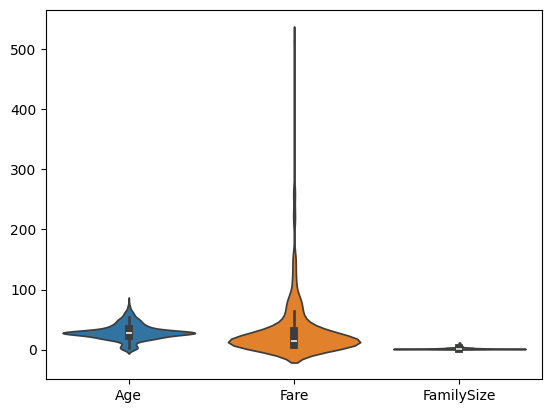

In [40]:
# Violin plot	KDE + boxplot hybrid
sns.violinplot(data=train[dist_cols])

### **3️⃣ Correlation Analysis**

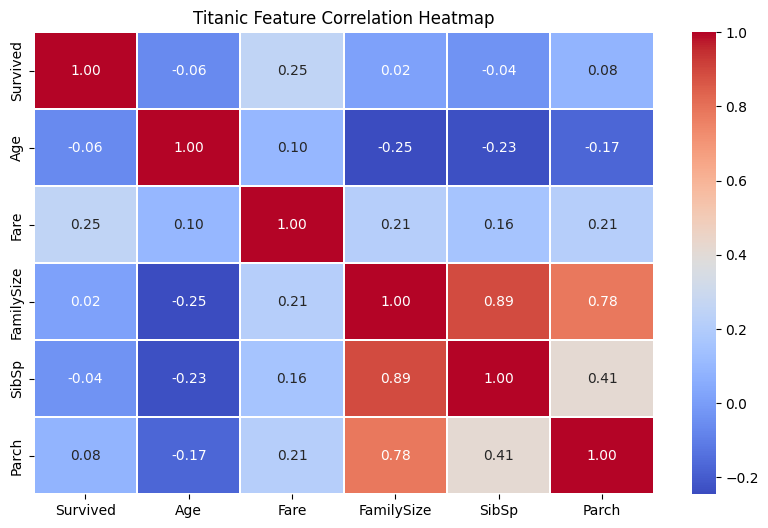

In [41]:
plt.figure(figsize=(10,6))
corr = train[['Survived', 'Age', 'Fare', 'FamilySize', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.title("Titanic Feature Correlation Heatmap")
plt.show()

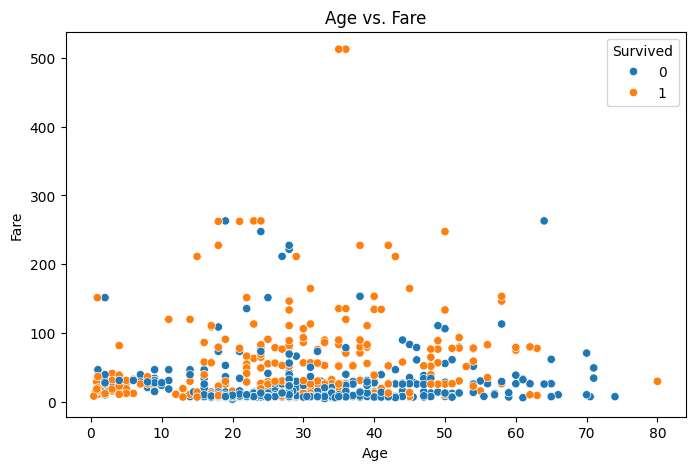

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title("Age vs. Fare")
plt.show()

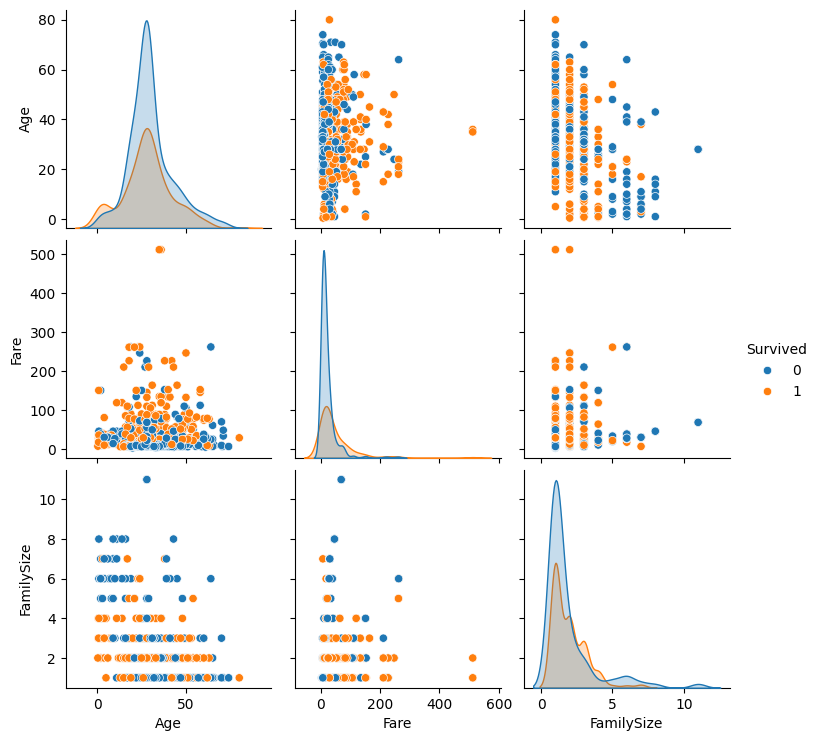

In [43]:
sns.pairplot(train[['Age', 'Fare', 'FamilySize','Survived']],hue='Survived')

### **4️⃣ Grouped Comparison**

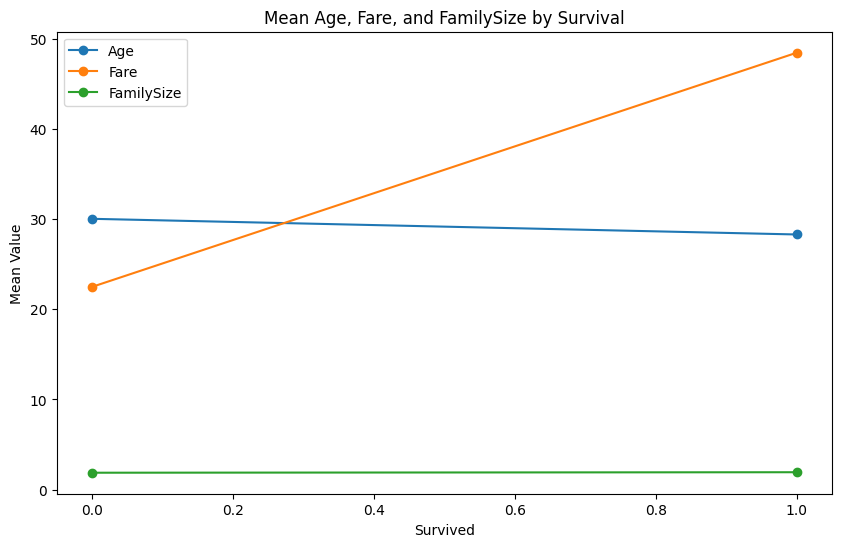

In [44]:
train.groupby('Survived')[['Age','Fare','FamilySize']].mean().plot(marker='o', figsize=(10,6))
plt.title("Mean Age, Fare, and FamilySize by Survival")
plt.ylabel("Mean Value")
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

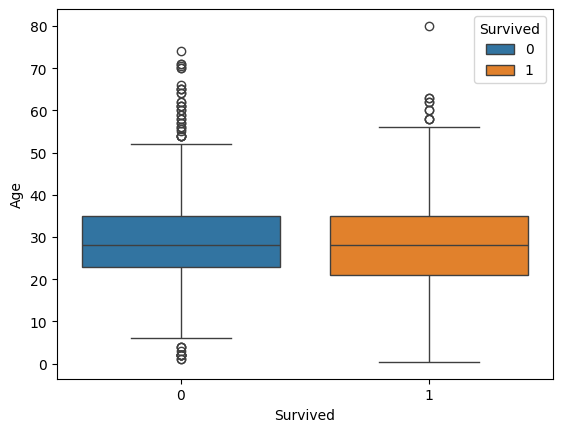

In [45]:
sns.boxplot(x='Survived', y='Age', data=train, hue='Survived')

<Axes: xlabel='AgeGroup', ylabel='Fare'>

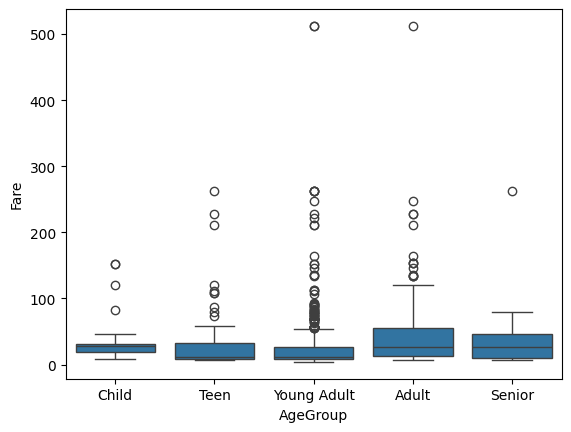

In [46]:
sns.boxplot(x='AgeGroup', y='Fare', data=train)

Text(0.5, 1.0, 'Passenger Count by Age Bin')

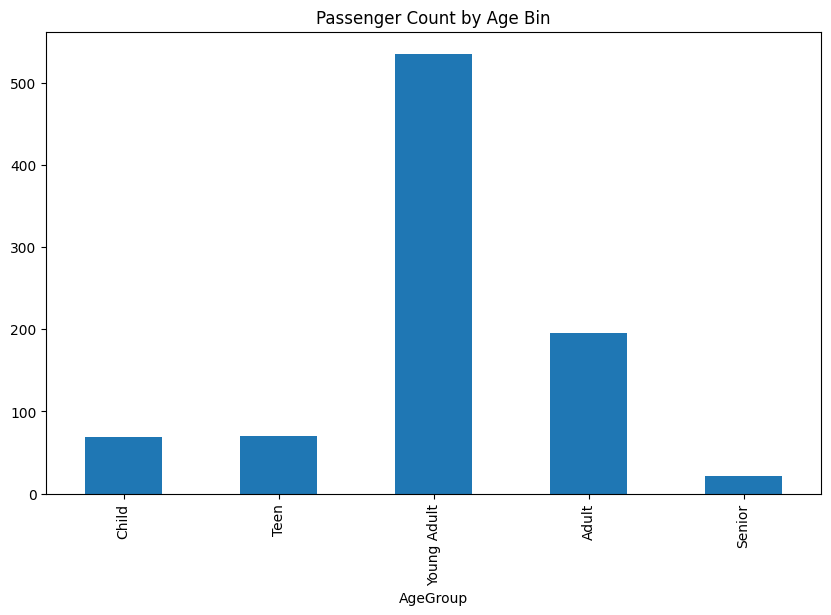

In [47]:
train['AgeGroup'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title("Passenger Count by Age Bin")

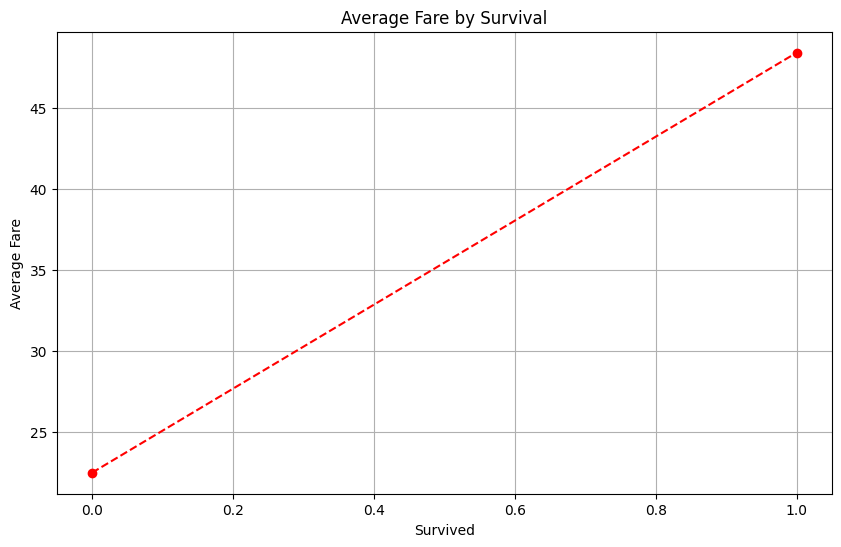

In [48]:
plt.figure(figsize=(10,6))
train.groupby('Survived')['Fare'].mean().plot(marker='o', linestyle='--', color='red')
plt.title("Average Fare by Survival")
plt.xlabel("Survived")
plt.ylabel("Average Fare")
plt.grid(True)
plt.show()

### **5️⃣ Categorical Distributions**

<Axes: xlabel='Sex', ylabel='count'>

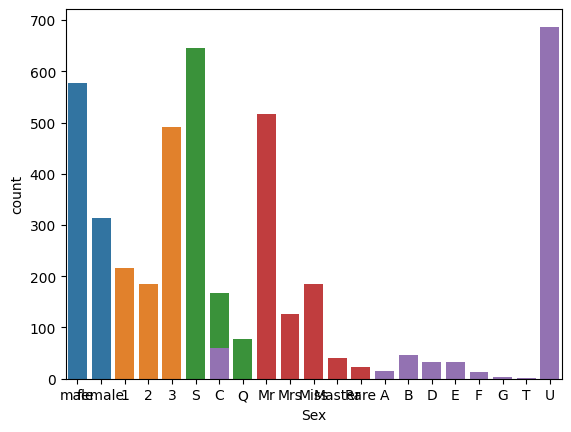

In [49]:
# Barplots for category frequency	Check class imbalance
sns.countplot(x='Sex', data=train)
sns.countplot(x='Pclass', data=train)
sns.countplot(x='Embarked', data=train)
sns.countplot(x='Title', data=train)
sns.countplot(x='Deck', data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

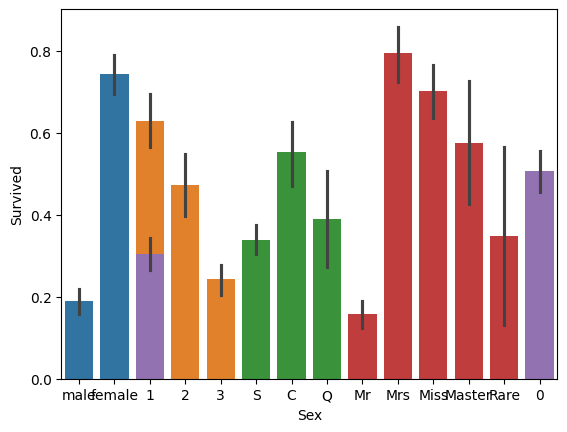

In [50]:
# Barplot (x=categorical, y=target)	Impact on target variable (e.g., survival rate)
sns.barplot(x='Sex', y='Survived', data=train)
sns.barplot(x='Pclass', y='Survived', data=train)
sns.barplot(x='Embarked', y='Survived', data=train)
sns.barplot(x='Title', y='Survived', data=train)
sns.barplot(x='IsAlone', y='Survived', data=train)

<Axes: xlabel='Sex', ylabel='count'>

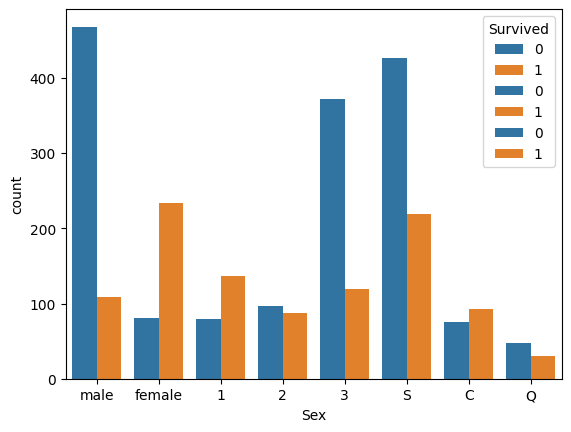

In [51]:
# Countplots with hue	Categorical variable split by target
sns.countplot(x='Sex', hue='Survived', data=train)
sns.countplot(x='Pclass', hue='Survived', data=train)
sns.countplot(x='Embarked', hue='Survived', data=train)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Title
Master    0.575000
Miss      0.701087
Mr        0.156673
Mrs       0.795276
Rare      0.347826
Name: Survived, dtype: float64
Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64


Text(0, 0.5, 'Survival Probability')

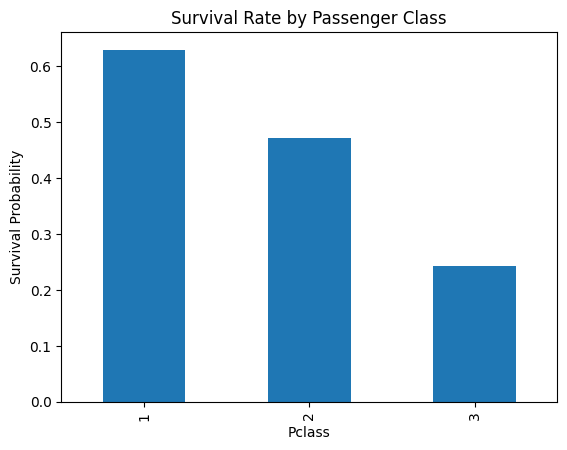

In [52]:
# GroupBy with .mean() on target	More readable insights
print(train.groupby('Sex')['Survived'].mean())
print(train.groupby('Pclass')['Survived'].mean())
print(train.groupby('Title')['Survived'].mean())
print(train.groupby('Deck')['Survived'].mean())
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")

### **6️⃣ Target Variable Distribution**

In [53]:
# Class balance check (especially for classification)
train['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

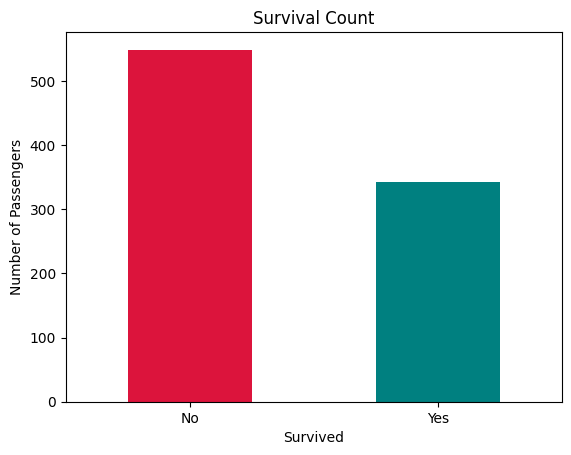

In [54]:
train['Survived'].value_counts().plot(kind='bar', color=['crimson', 'teal'])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

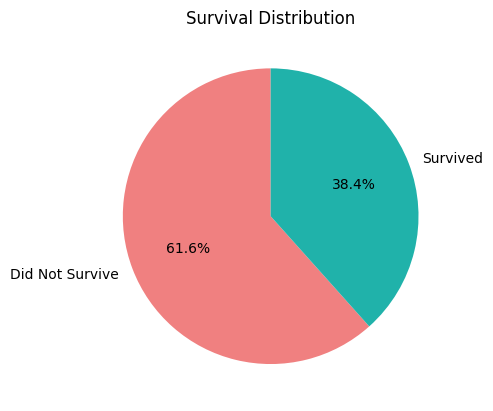

In [55]:
# Visualize with pie or bar chart	Quick overview
train['Survived'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=['Did Not Survive', 'Survived'],
    colors=['lightcoral', 'lightseagreen']
)
plt.ylabel('')
plt.title("Survival Distribution")
plt.show()

# **STEP 5: Data Preprocessing**

In [56]:
# Encoding for (Categorical Data)

for df in [train, test]:
    # Encode Sex
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    # Ensure Pclass is integer
    df['Pclass'] = df['Pclass'].astype(int)

# One-Hot Encoding (after both datasets have all required features)
cols = ['Embarked', 'Deck', 'Title', 'AgeGroup', 'FareBand', 'FamilyType', 'SimplifiedDeck', 'IsChild']
train = pd.get_dummies(train, columns=cols, drop_first=True)
test = pd.get_dummies(test, columns=cols, drop_first=True)

# **Step 6: Feature Selection**
- We use multiple methods to determine which features should be kept and which ones can be dropped.

In [57]:
# Check correlation with Survived
train.corr()['Survived'].sort_values(ascending=False)

Survived                  1.000000
Sex                       0.543351
Title_Mrs                 0.344935
Title_Miss                0.332795
FamilyType_Small          0.279855
Fare                      0.254743
FareBand_High Fare        0.233638
SimplifiedDeck_Middle     0.213430
SimplifiedDeck_Upper      0.205840
Deck_B                    0.175095
Deck_D                    0.150716
Deck_E                    0.145321
Deck_C                    0.114652
IsChild_Child             0.112119
FareBand_Medium Fare      0.084239
Parch                     0.081629
Deck_F                    0.057935
AgeGroup_Teen             0.026859
AgeGroup_Adult            0.017590
FamilySize                0.016639
Deck_G                    0.016040
Embarked_Q                0.003650
PassengerId              -0.005007
Title_Rare               -0.012054
Deck_T                   -0.026456
SibSp                    -0.035322
AgeGroup_Senior          -0.051224
Age                      -0.064910
AgeGroup_Young Adult

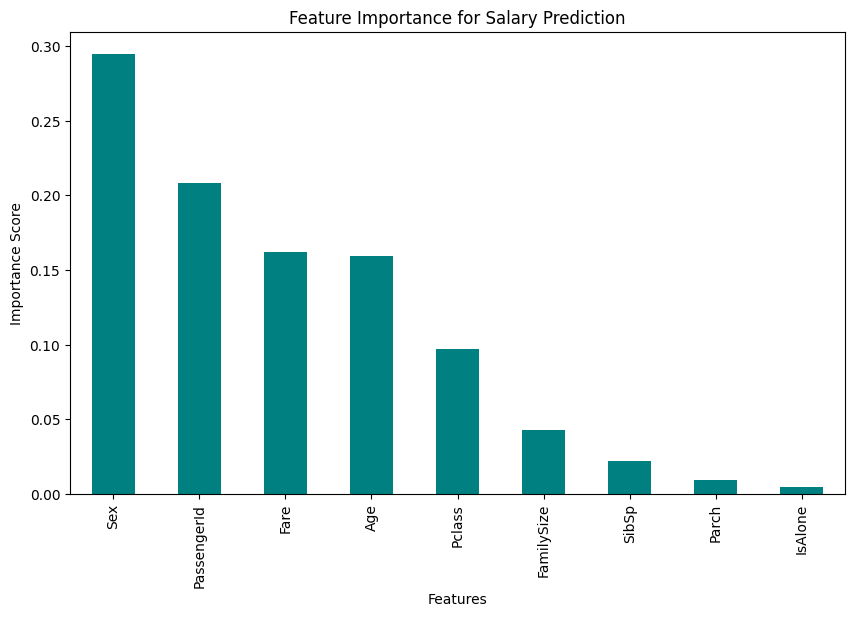

In [58]:
# Check Feature Importance Using a Random Forest Model

dfc_copy = train.copy()
# Prepare data (Remove non-numeric columns)
df_importance = dfc_copy.select_dtypes(include=[np.number]).dropna()

# Define Features (X) and Target (y)
X = df_importance.drop(columns=['Survived'])  # Predicting Salary (TotalPay)
y = df_importance['Survived']

# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get Feature Importance Scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
feature_importance.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Feature Importance for Salary Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [59]:
for df in [train,test]:
    df.drop(columns=['SibSp', 'Parch', 'IsAlone'], inplace=True)

# **STEP 7: Modeling**

In [60]:
# Splitting Data into Training, Validation, and Test Sets

# Define Features (X) and Target (y)
X = train.drop(columns=['Survived','PassengerId'])  
y = train['Survived']  
print(X.shape, y.shape)

(891, 32) (891,)


In [61]:
# Split into Train (70%), Validation (15%), and Test (15%)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(712, 32) (179, 32) (712,) (179,)


In [62]:
# matching test columns with train set
test = test.reindex(columns=train.drop(['Survived','PassengerId'], axis=1).columns, fill_value=0)
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teen', 'AgeGroup_Young Adult', 'AgeGroup_Adult', 'AgeGroup_Senior', 'FareBand_Low Fare', 'FareBand_Medium Fare', 'FareBand_High Fare', 'FamilyType_Large', 'FamilyType_Small', 'SimplifiedDeck_Middle', 'SimplifiedDeck_Unknown', 'SimplifiedDeck_Upper', 'IsChild_Child'], dtype='object')

In [63]:
# to avoid data leakage and ensure that our model generalizes well.
scaler = MinMaxScaler()
# computing the mean and std only from the training set, avoiding data leakage.
X_train_scaled = scaler.fit_transform(X_train)  # ✅ Fit on training data
X_val_scaled  = scaler.transform(X_val) # ✅ Transform validation (unseen) data
X_test_scaled = scaler.transform(test) # ✅ Transform Kaggle test data (also unseen)
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [64]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_features="sqrt", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1)
}

classification_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    summary = {
        "Model": name,
        "Accuracy": round(accuracy_score(y_val, y_pred), 4),
        "Precision": round(precision_score(y_val, y_pred, average='macro'), 4),
        "Recall": round(recall_score(y_val, y_pred, average='macro'), 4),
        "F1 Score": round(f1_score(y_val, y_pred, average='macro'), 4),
    }

    classification_results.append(summary)

classification_df = pd.DataFrame(classification_results)
classification_df.sort_values(by="F1 Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
7,XGBoost,0.8212,0.8113,0.8113,0.8113
8,LightGBM,0.8212,0.8113,0.8113,0.8113
0,Logistic Regression,0.8156,0.8058,0.8041,0.8049
5,SVM (Linear Kernel),0.8045,0.7959,0.7869,0.7906
3,Gradient Boosting,0.8045,0.7992,0.7815,0.7879
6,KNN,0.7877,0.7796,0.7652,0.7705
1,Random Forest,0.7821,0.7715,0.7633,0.7667
4,AdaBoost,0.7765,0.7641,0.7669,0.7654
2,Decision Tree,0.7709,0.7583,0.7569,0.7576


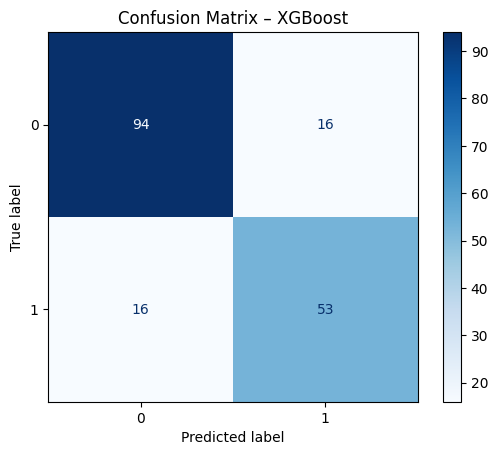


Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.77      0.77      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [65]:
# Find the best model based on F1 Score
best_model_name = classification_df.sort_values(by="F1 Score", ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

# Make predictions
y_pred = best_model.predict(X_val_scaled)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.title(f"Confusion Matrix – {best_model_name}")
plt.show()

# Print classification report
print(f"\nClassification Report for {best_model_name}")
print(classification_report(y_val, y_pred))

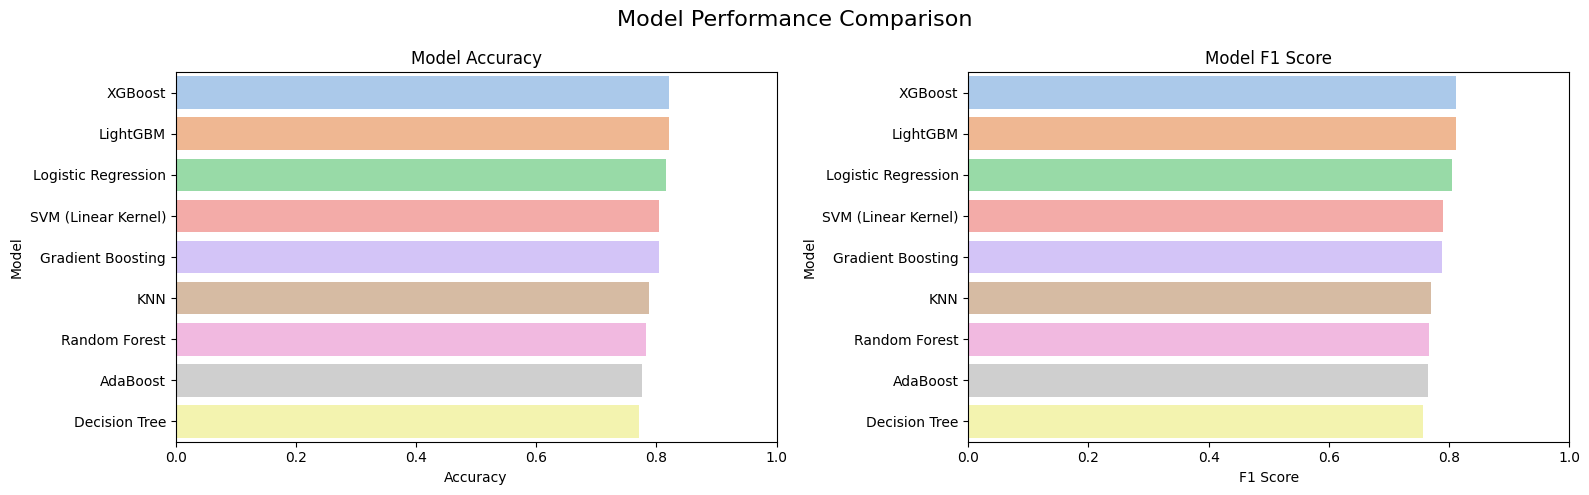

In [66]:
# Sort by F1 Score (or Accuracy if you want)
classification_df_sorted = classification_df.sort_values(by="F1 Score", ascending=False)  # Ascending so best model is at top (barplot is horizontal)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy plot
sns.barplot(
    y='Model', x='Accuracy',
    data=classification_df_sorted,
    order=classification_df_sorted['Model'],
    palette='pastel',
    ax=axes[0]
)
axes[0].set_title("Model Accuracy")
axes[0].set_xlim(0, 1)

# F1 Score plot
sns.barplot(
    y='Model', x='F1 Score',
    data=classification_df_sorted,
    order=classification_df_sorted['Model'],
    palette='pastel',
    ax=axes[1]
)
axes[1].set_title("Model F1 Score")
axes[1].set_xlim(0, 1)

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()


# **STEP 8: Model Evaluation**

In [69]:
# Define models and their hyperparameter grids
models_grid = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=9),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'SVM (Linear/RBF)': {
        'model': SVC(probability=True),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 4],
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 4],
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42, verbose=-1),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 50],
        }
    }
}

# Train and evaluate models
# Train and evaluate models
summary_list = []
best_estimators = {}

for name, model_info in models_grid.items():
    print(f"🔍 Tuning: {name}")
    model = model_info['model']
    param_grid = model_info['param_grid']
    # for faster convergence and run (due to the large dataset)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val_scaled)
    
    cross_val = cross_val_score(grid_search.best_estimator_, X_train_scaled,y_train,cv=5)
    print(f"Mean cross-validation score: {cross_val.mean():.4f}")
    
    summary_list.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Accuracy": round(accuracy_score(y_val, y_pred), 4),
        "Precision": round(precision_score(y_val, y_pred, average='macro'), 4),
        "Recall": round(recall_score(y_val, y_pred, average='macro'), 4),
        "F1 Score": round(f1_score(y_val, y_pred, average='macro'), 4),
        "CV Score": round(cross_val.mean(), 4)
    })

    best_estimators[name] = best_model

# Create DataFrame and display
summary_df = pd.DataFrame(summary_list).sort_values(by='Accuracy', ascending=False)
summary_df

🔍 Tuning: Logistic Regression
Mean cross-validation score: 0.8259
🔍 Tuning: KNN
Mean cross-validation score: 0.8244
🔍 Tuning: SVM (Linear/RBF)
Mean cross-validation score: 0.8245
🔍 Tuning: Decision Tree
Mean cross-validation score: 0.8077
🔍 Tuning: Random Forest
Mean cross-validation score: 0.8329
🔍 Tuning: Gradient Boosting
Mean cross-validation score: 0.8259
🔍 Tuning: XGBoost
Mean cross-validation score: 0.8231
🔍 Tuning: AdaBoost
Mean cross-validation score: 0.8245
🔍 Tuning: LightGBM
Mean cross-validation score: 0.8274


,Model,Best Params,Accuracy,Precision,Recall,F1 Score,CV Score
6,XGBoost,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.8156,0.8172,0.7879,0.7972,0.8231
0,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.8101,0.8002,0.7968,0.7984,0.8259
4,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.8101,0.8045,0.7887,0.7947,0.8329
8,LightGBM,"{'learning_rate': 0.1, 'n_estimators': 50, 'nu...",0.8101,0.8013,0.7941,0.7972,0.8274
2,SVM (Linear/RBF),"{'C': 1, 'kernel': 'linear'}",0.8045,0.7959,0.7869,0.7906,0.8245
7,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 100}",0.8045,0.7947,0.7896,0.7919,0.8245
3,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.7989,0.7892,0.7823,0.7853,0.8077
5,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.7877,0.7814,0.7625,0.7690,0.8259
1,KNN,{'n_neighbors': 3},0.7598,0.7491,0.7343,0.7394,0.8244


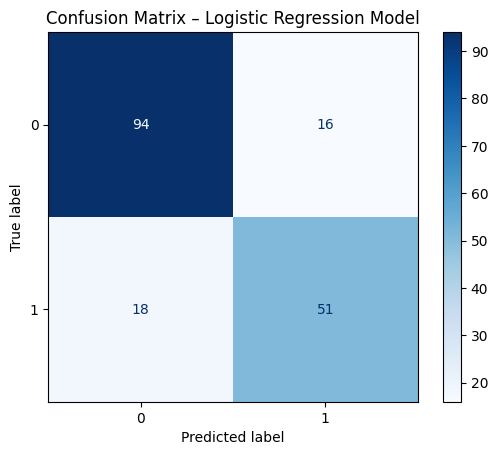

Classification Report – Logistic Regression Model
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [70]:
# Choose based on summary_df or your evaluation results
best_model_name = summary_df.sort_values(by='F1 Score',ascending=False).iloc[0]['Model']
best_model = best_estimators[best_model_name]

# Evaluate
y_pred = best_model.predict(X_val_scaled)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_val_scaled, y_val, cmap='Blues')
plt.title(f"Confusion Matrix – {best_model_name} Model")
plt.show()

# Classification Report
print(f"Classification Report – {best_model_name} Model")
print(classification_report(y_val, y_pred))

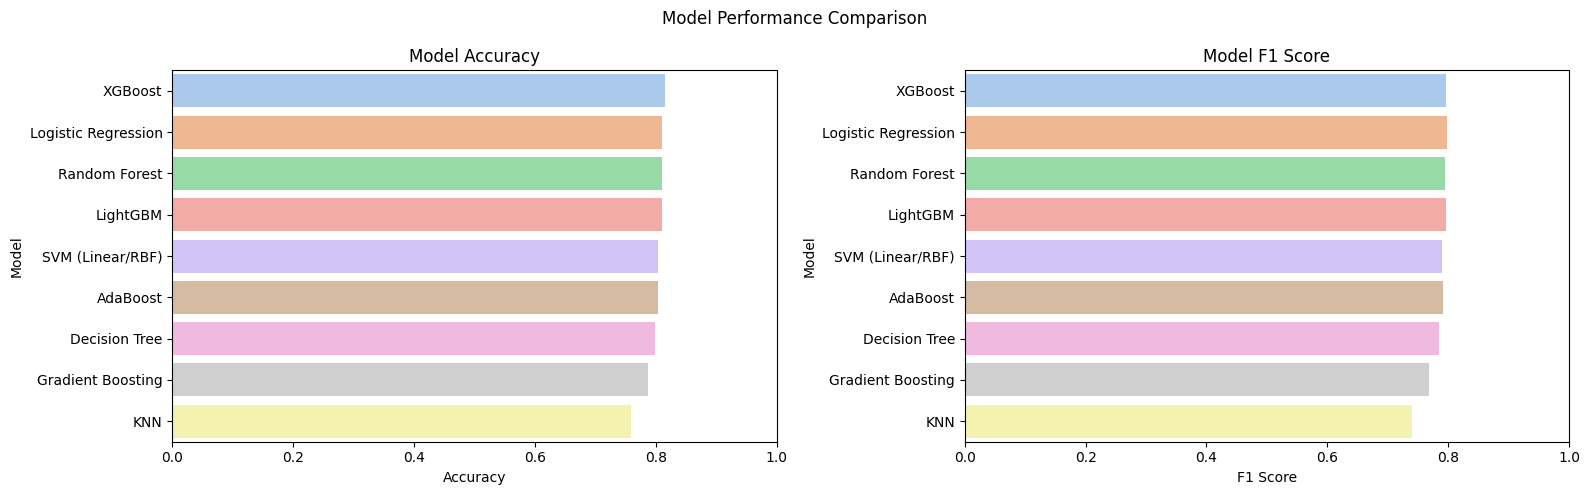

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(y=summary_df['Model'], x=summary_df['Accuracy'], palette='pastel', ax=axes[0])
axes[0].set_title("Model Accuracy")
axes[0].set_xlim(0, 1)

sns.barplot(y=summary_df['Model'], x=summary_df['F1 Score'], palette='pastel', ax=axes[1])
axes[1].set_title("Model F1 Score")
axes[1].set_xlim(0, 1)

plt.suptitle("Model Performance Comparison")
plt.tight_layout()
plt.show()

# **Step 9: Deployment & Submission**

In [74]:
# combine train and validation sets
X_full = pd.concat([X_train,X_val])
y_full = pd.concat([y_train, y_val])

# refit scaler on full data
final_scaler = MinMaxScaler()
X_full_scaled = final_scaler.fit_transform(X_full)
X_test_scaled = final_scaler.transform(test)

# Load best tuned model
best_model_name = summary_df.iloc[0]['Model']
best_model = best_estimators[best_model_name]

# Retrain best model on full data
final_model = best_model.__class__(**best_model.get_params())  # copy tuned parameters
final_model = best_model.fit(X_full_scaled, y_full)

# Predict on test set
test_predictions = final_model.predict(X_test_scaled)
test_predictions

# Prepare submission file
submission = pd.read_csv("C:/Users/ARZ/Desktop/gender_submission.csv")
submission["Survived"] = test_predictions
submission.to_csv("submission.csv", index=False)

# Save final model and scaler
joblib.dump(final_model, "final_model.pkl")
joblib.dump(final_scaler, "final_scaler.pkl")

print(f"✅ Submission file saved as submission.csv")
print(f"✅ Final model saved as final_model.pkl")
print(f"✅ Final scaler saved as final_scaler.pkl")

✅ Submission file saved as submission.csv
✅ Final model saved as final_model.pkl
✅ Final scaler saved as final_scaler.pkl
